# Grover experiment for N=5 qubits



#### We dismantle here a Grover circuit to see what is going on inside it. First, we make a standard measurement for 1024 shots in 1 iteration.

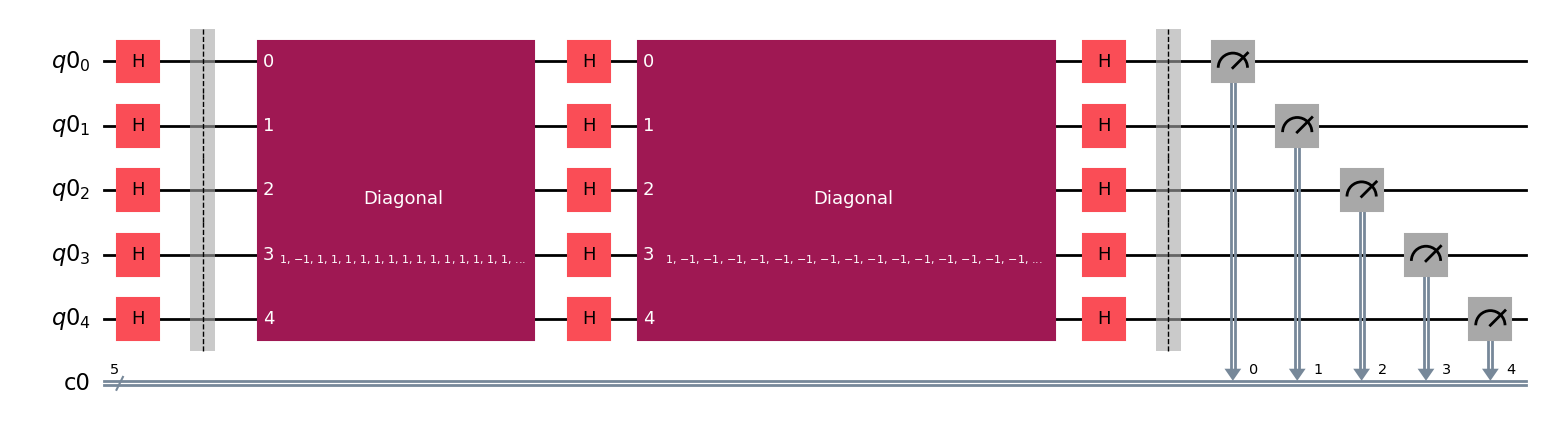

In [2]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import DiagonalGate
import numpy as np
cr1 = ClassicalRegister(5)
qr = QuantumRegister(5)
qc = QuantumCircuit(qr, cr1)
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)
array = [1,-1]
for i in range(30):
    array.append(1) 
qc.append(DiagonalGate(array), [0,1,2,3,4])
for i in range(0,5):
    qc.h(i)
array2 = [1]
for j in range(31):
    array2.append(-1)
qc.append(DiagonalGate(array2), [0,1,2,3,4])
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)

qc.measure([0,1,2,3,4],cr1)
qc.draw(output='mpl')

In [3]:
from qiskit_aer import Aer
from qiskit import transpile

backend = Aer.get_backend('aer_simulator')
qc_transpiled = transpile(qc, backend)
job = backend.run([qc_transpiled])
results = job.result().get_counts()
print(results)
print(len(results))

{'11111': 36, '00000': 20, '11010': 25, '10001': 32, '10111': 23, '01111': 31, '01100': 28, '10101': 30, '00011': 26, '01011': 24, '00001': 258, '00101': 21, '11011': 18, '10010': 31, '01110': 26, '01101': 19, '00010': 23, '10110': 17, '00111': 21, '10100': 19, '11110': 29, '10000': 20, '01001': 21, '11101': 29, '01010': 20, '00110': 28, '01000': 29, '11000': 26, '11001': 29, '10011': 30, '00100': 17, '11100': 18}
32


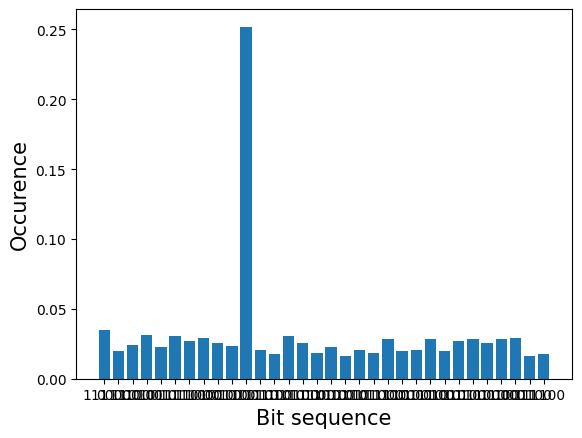

In [ ]:
import matplotlib.pyplot as plt

x1 = list(results.keys())
y1 = list(results.values())
y_cor = []
for i in y1:
    x = i / 1024 #If shots = 1024. For other values, one must change it 
    y_cor.append(x)
plt.bar(x1,y_cor)
plt.ylabel('Occurence', size=15)
plt.xlabel('Bit sequence', size=15)
plt.show()

#### At this point we start using Statevector function that clarify our state throught all steps of Grover algorithm

In [5]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import DiagonalGate
import numpy as np
from qiskit.quantum_info import Statevector
cr1 = ClassicalRegister(5)
qr = QuantumRegister(5)
qc = QuantumCircuit(qr, cr1)
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)
state = Statevector.from_instruction(qc)
print("First part:")
print(state)
print(np.abs(state.data**2))
array = [1,-1]
for i in range(30):
    array.append(1) 
qc.append(DiagonalGate(array), [0,1,2,3,4])
for i in range(0,5):
    qc.h(i)
state = Statevector.from_instruction(qc)
print("Second part:")
print(state)
print(np.abs(state.data**2))
array2 = [1]
for j in range(31):
    array2.append(-1)
qc.append(DiagonalGate(array2), [0,1,2,3,4])
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)
state = Statevector.from_instruction(qc)
print("Final part:")
print(state)
print(np.abs(state.data**2))


First part:
Statevector([0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j,
             0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j, 0.1767767+0.j],
            dims=(2, 2, 2, 2, 2))
[0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125]
Second part:
Statevector([ 0.9375-2.94392336e-17j,  0.0625+1.34929821e-17j,
             -0.0625+6.37850061e

#### Now we make for these stages graphs, that show a probability of obtaining a certain state.

First part:
[0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125 0.03125
 0.03125 0.03125 0.03125 0.03125 0.03125]


Text(0.5, 0, 'States')

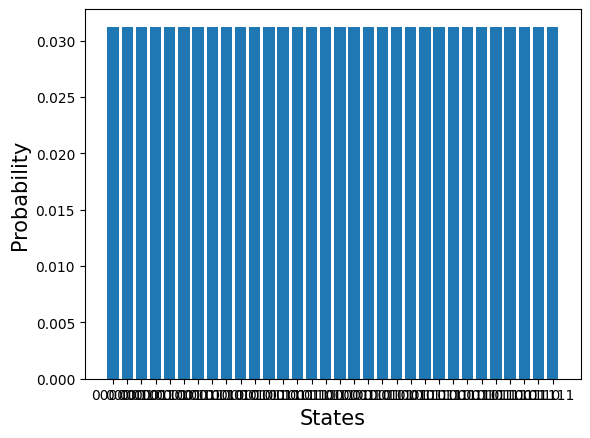

In [6]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import DiagonalGate
import numpy as np
from qiskit.quantum_info import Statevector
cr1 = ClassicalRegister(5)
qr = QuantumRegister(5)
qc = QuantumCircuit(qr, cr1)
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)
state = Statevector.from_instruction(qc)
print("First part:")
y1 = (np.abs(state.data**2))
print(y1)
x1 = ['00000', '00001','00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']
plt.bar(x1,y1)
plt.ylabel('Probability', size=15)
plt.xlabel('States', size =15)

Second part:
[0.87890625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625]


Text(0.5, 0, 'States')

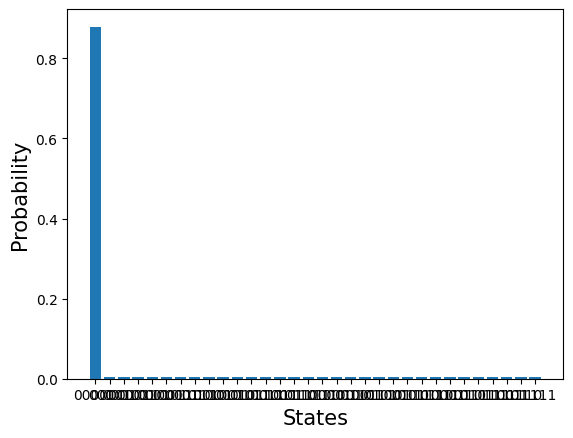

In [7]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import DiagonalGate
import numpy as np
from qiskit.quantum_info import Statevector
cr1 = ClassicalRegister(5)
qr = QuantumRegister(5)
qc = QuantumCircuit(qr, cr1)
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)
array = [1,-1]
for i in range(30):
    array.append(1) 
qc.append(DiagonalGate(array), [0,1,2,3,4])
for i in range(0,5):
    qc.h(i)
state = Statevector.from_instruction(qc)
print("Second part:")
y1 = (np.abs(state.data**2))
print(y1)
x1 = ['00000', '00001','00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']
plt.bar(x1,y1)
plt.ylabel('Probability', size=15)
plt.xlabel('States', size =15)


Final part:
[0.02392578 0.25830078 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578]


Text(0.5, 0, 'States')

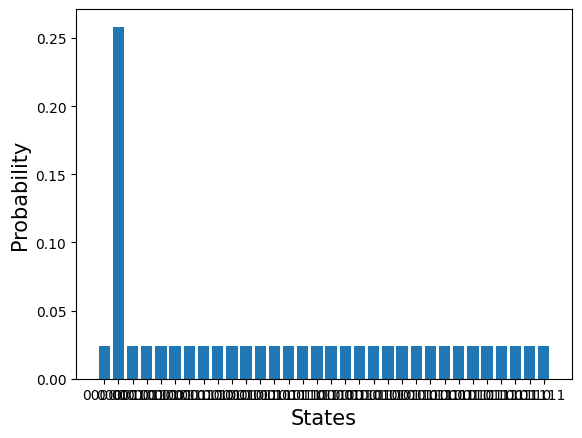

In [8]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.circuit.library import DiagonalGate
import numpy as np
from qiskit.quantum_info import Statevector
cr1 = ClassicalRegister(5)
qr = QuantumRegister(5)
qc = QuantumCircuit(qr, cr1)
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)
array = [1,-1]
for i in range(30):
    array.append(1) 
qc.append(DiagonalGate(array), [0,1,2,3,4])
for i in range(0,5):
    qc.h(i)
array2 = [1]
for j in range(31):
    array2.append(-1)
qc.append(DiagonalGate(array2), [0,1,2,3,4])
for i in range(0,5):
    qc.h(i)
    qc.barrier(i)
state = Statevector.from_instruction(qc)
print("Final part:")
y1 = (np.abs(state.data**2))
print(y1)
x1 = ['00000', '00001','00010', '00011', '00100', '00101', '00110', '00111', '01000', '01001', '01010', '01011', '01100', '01101', '01110', '01111', '10000', '10001', '10010', '10011', '10100', '10101', '10110', '10111', '11000', '11001', '11010', '11011', '11100', '11101', '11110', '11111']
plt.bar(x1,y1)
plt.ylabel('Probability', size=15)
plt.xlabel('States', size =15)

#### This part is an insight into a relationship between following iterations and probability of obtaining a desired state (here 00001).


Iteration 1:
[0.02392578 0.25830078 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578 0.02392578
 0.02392578 0.02392578]
Iters. done:[Current cost:0.258300781250001]

Iteration 2:
[0.01282501 0.60242462 0.01282501 0.01282501 0.01282501 0.01282501
 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501
 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501
 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501
 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501 0.01282501
 0.01282501 0.01282501]
Iters. done:[Current cost:0.602424621582035]

Iteration 3:
[0.00332463 0.89693654 0.00332463 0.00332463 0.00332463 0.00332463
 0.00332463 0.00332463 0.00332463 0.00332463 0.00332463 0.00332463
 0.00332463 0.00

([<matplotlib.axis.XTick at 0x1ef94e016d0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

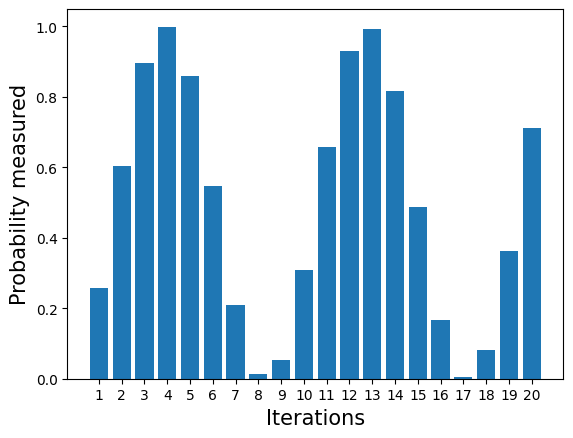

In [24]:
cost_history_dict0 = {"cost_history": []}
qc3 = QuantumCircuit(5)
qc3.h([0,1,2,3,4])

for k in range(0,20):
        array = [1,-1]
        for i in range(30):
            array.append(1) 
        qc3.append(DiagonalGate(array), [0,1,2,3,4])
        for i in range(0,5):
             qc3.h(i)
        array2 = [1]
        for j in range(31):
            array2.append(-1)
        qc3.append(DiagonalGate(array2), [0,1,2,3,4])
        for i in range(0,5):
            qc3.h(i)
            qc3.barrier(i)
        state = Statevector.from_instruction(qc3)
        print(f"\nIteration {k+1}:")
        result = np.round(abs(state.data)**2, 15)
        print(result)
        aim = result[1]
        cost_history_dict0["cost_history"].append(aim)
        print(f"Iters. done:[Current cost:{aim}]")

y11 = list(cost_history_dict0.values())
converted = [[float(x) for x in row] for row in y11]
y1 = converted[0]
print(y1)

x1 = []
for i in range(0,20):
    a = 1
    a += i
    x1.append(a)

plt.bar(x1,y1)
plt.ylabel('Probability measured', size=15)
plt.xlabel('Iterations' , size=15)
plt.xticks(np.arange(min(x1), max(x1) + 1, 1))


3.942882938158366


([<matplotlib.axis.XTick at 0x1ef93156990>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20')])

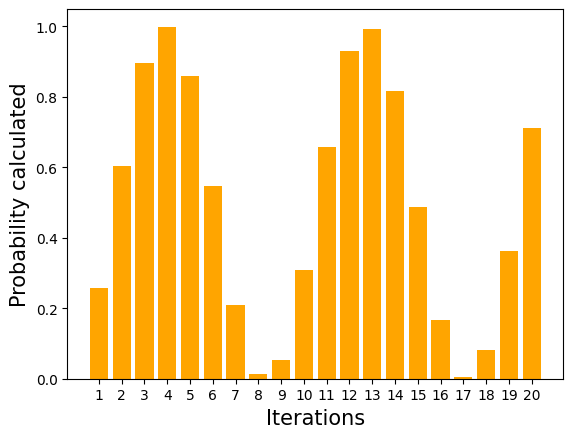

In [16]:
import math as mt

number_qubits = 2**5 
number_solutions = 1 
k_opt = (np.pi / 4) * np.sqrt(number_qubits / number_solutions) - 1/2 
print(k_opt)

y2 = []
for i in range(1,21):
    prob = (np.sin((2*i + 1)*mt.acos(np.sqrt((32 - 1) / 32))))**2
    y2.append(prob)

plt.bar(x1,y2, color='orange')
plt.ylabel('Probability calculated', size=15)
plt.xlabel('Iterations', size=15)
plt.xticks(np.arange(min(x1), max(x1) + 1, 1))